In [15]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_graph import (
  MorseGraph, 
  color_by_position,
  attribute_cost_mat,
)
from mcopt.optimal_transport import (
  GW, fGW,
  color_transfer,
  color_transfer_expected_color
)

# Load Morse Complex

In [16]:
mc = load_complex('gen_data/complex')
mc_noisy = load_complex('gen_data/complex_noisy')

# Construct Morse Graph

In [17]:
mg = MorseGraph.from_complex(mc).sample(5, mode='geo_dist')

mg_noisy = MorseGraph.from_complex(mc_noisy).sample(5, mode='geo_dist')

## Initial Graphs

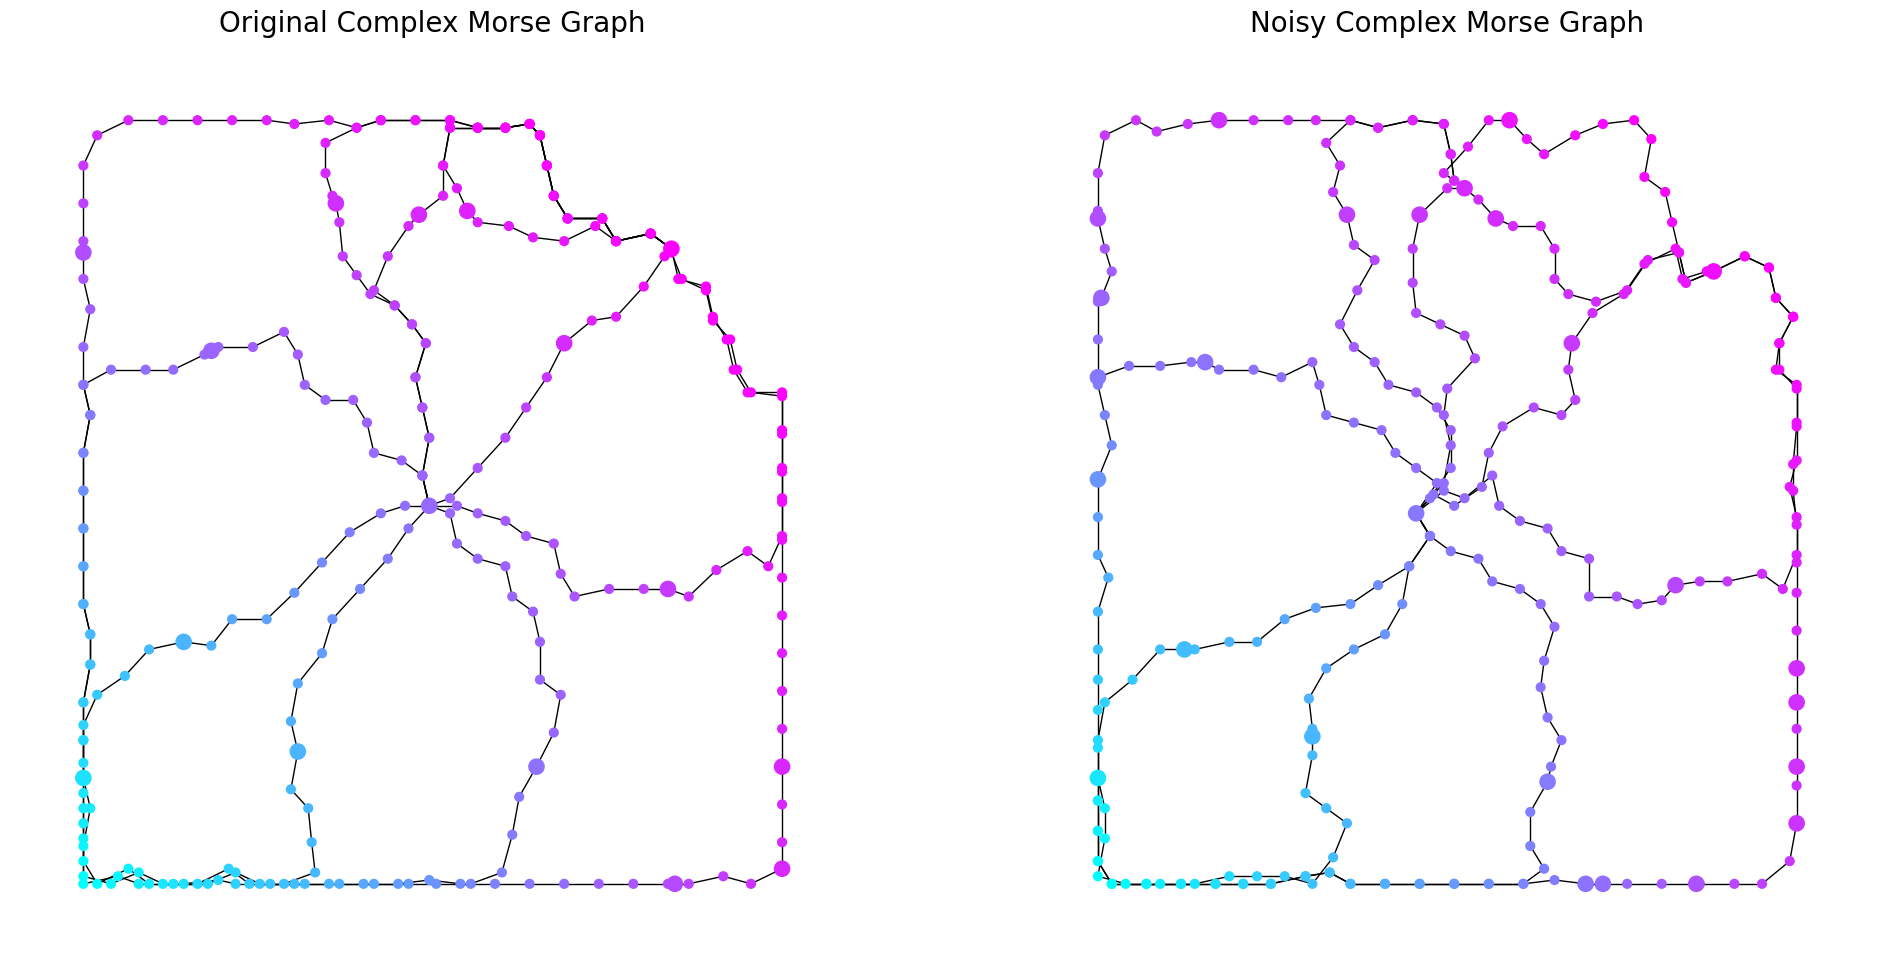

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axis[0], node_size=40, cmap=cmap)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(ax=axis[1], node_size=40, cmap=cmap)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()

# Run Optimal Transport

## Gromov-Wasserstein Optimal Transport

In [19]:
mg_net = mg.to_measure_network()
mg_noisy_net = mg_noisy.to_measure_network()

coupling = GW(mg_net, mg_noisy_net)

## Fused Gromov-Wasserstein Optimal Transport

In [20]:
M = attribute_cost_mat(mg, mg_noisy)

fused_coupling = fGW(mg_net, mg_noisy_net, M)

# Generate Color Transfer

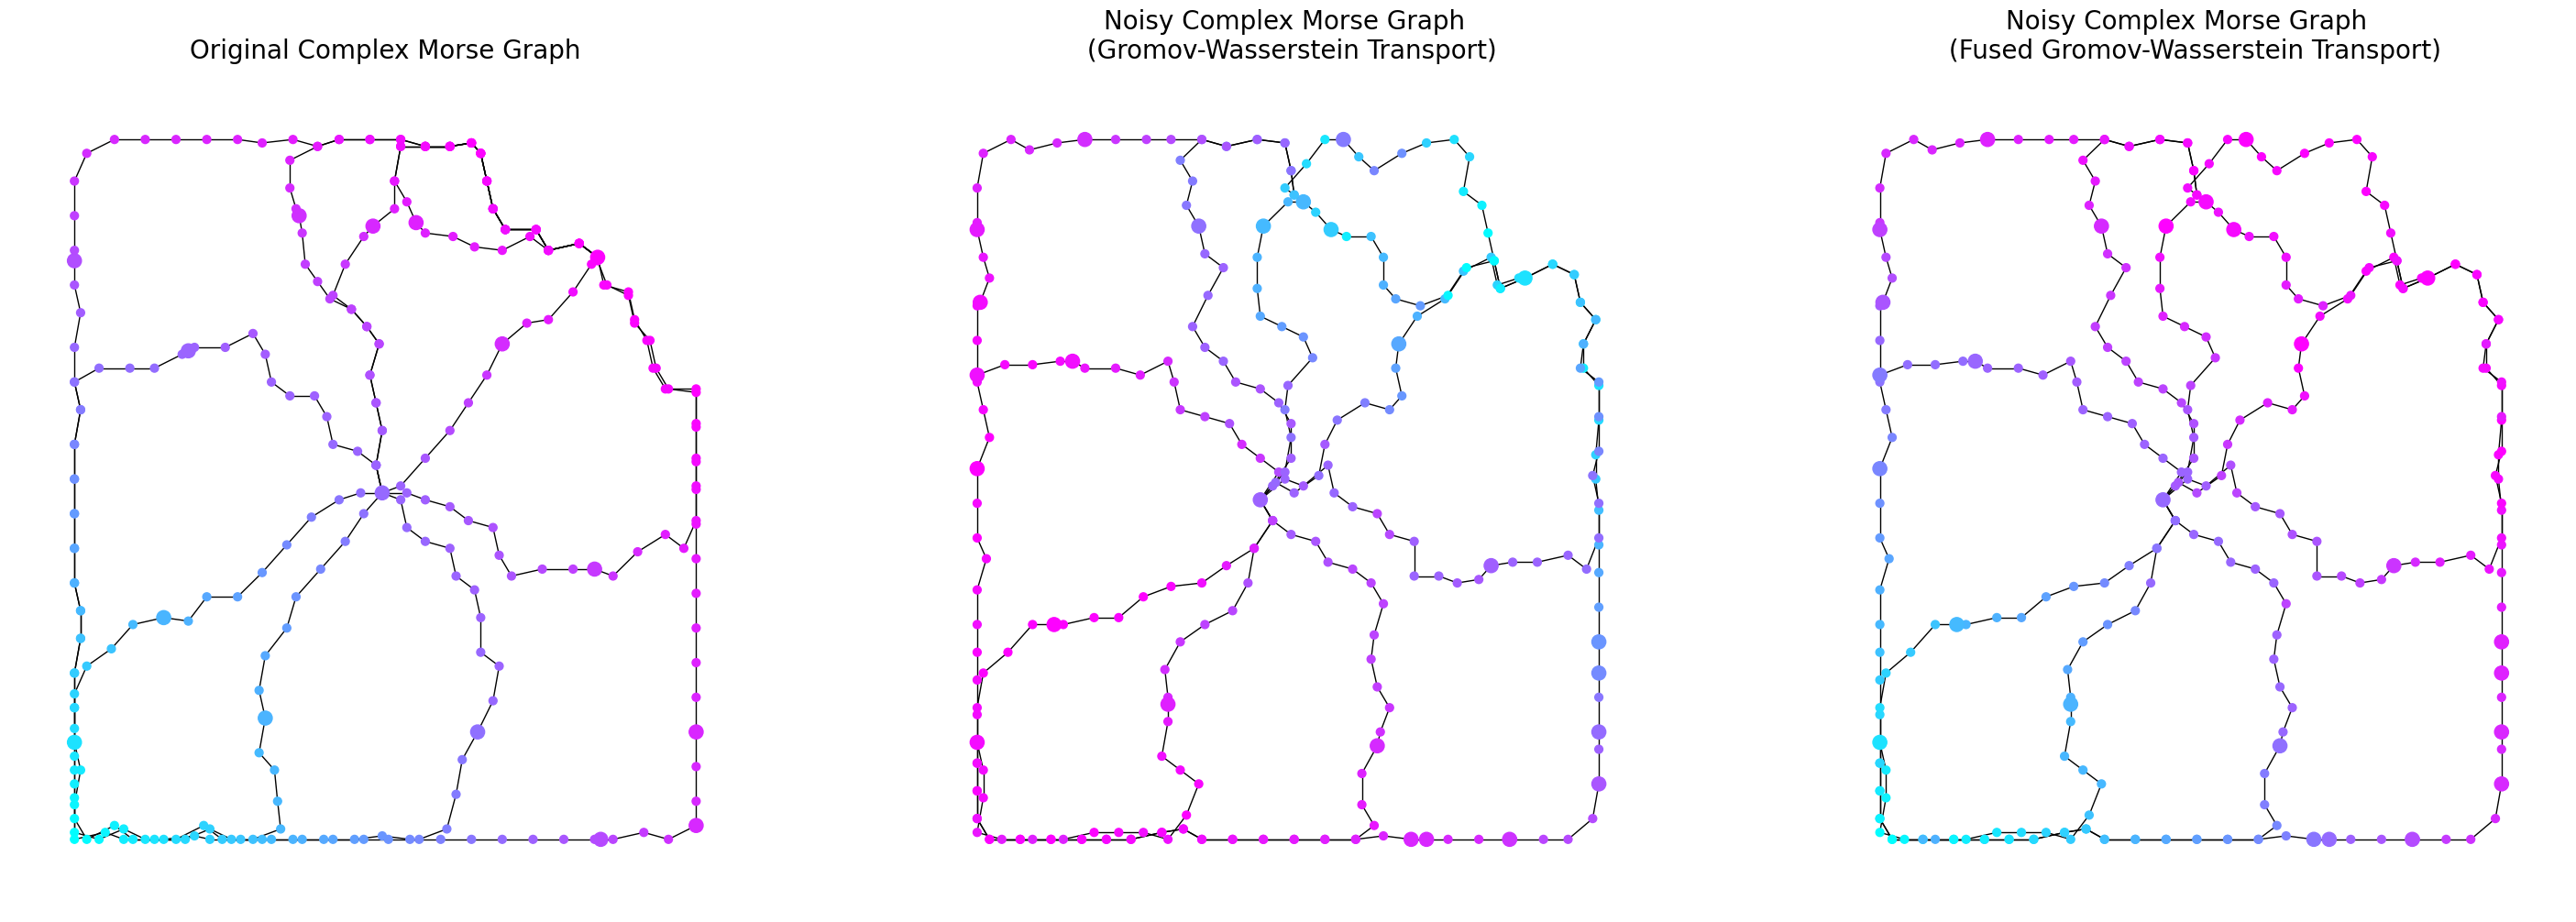

In [21]:
fig, axis = plt.subplots(1, 3, figsize=(36, 12))
cmap = 'cool'

mg_node_color = color_by_position(mg)

mg_noisy_node_color = color_transfer(
  mg_net, 
  mg_noisy_net, 
  coupling,
  mg_node_color, 
)

fused_mg_noisy_node_color = color_transfer(
  mg_net,
  mg_noisy_net,
  fused_coupling,
  mg_node_color,
)

mg.draw(
  ax=axis[0], 
  node_size=40, 
  node_color=mg_node_color, 
  cmap=cmap
)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(
  ax=axis[1], 
  node_size=40, 
  node_color=mg_noisy_node_color,
  cmap=cmap
)
axis[1].set_title('Noisy Complex Morse Graph \n (Gromov-Wasserstein Transport)', fontsize=20)

mg_noisy.draw(
  ax=axis[2], 
  node_size=40, 
  node_color=fused_mg_noisy_node_color,
  cmap=cmap
)
axis[2].set_title('Noisy Complex Morse Graph \n (Fused Gromov-Wasserstein Transport)', fontsize=20)

plt.show()